### Percentile for Outlier Detection

### Outliers:

- The outliers may suggest experimental errors, variability in a measurement, or an anomaly. The age of a person may wrongly be recorded as 200 rather than 20 Years. Such an outlier should definitely be discarded from the dataset.

- However, not all outliers are bad. Some outliers signify that data is significantly different from others. For example, it may indicate an anomaly like bank fraud or a rare disease. In this case, outliers are useful for further modelling.

### Significance of outliers:

- Outliers badly affect mean and standard deviation of the dataset. 
- These may statistically give erroneous results.
- Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.
- Outliers are highly useful in anomaly detection like fraud detection where the fraud transactions are very different from normal transactions.

### Percentile Method:
- In this method we choose our upper limit and lower limit in form of percentile such as:

  - Upper limit: 95 percentile
  - Lower limit: 5 percentile
 
 
- Both the limits should always be symmetric means if we are ignoring 5 percentile from right(taking 95 percentile) then we will take 5 percentile as a lower limt.



- Any value which is less than lower limit and greater than upper limit is outliers.


- Generally people take: 99 percentile as upper limit, 1 percentile as lower limit

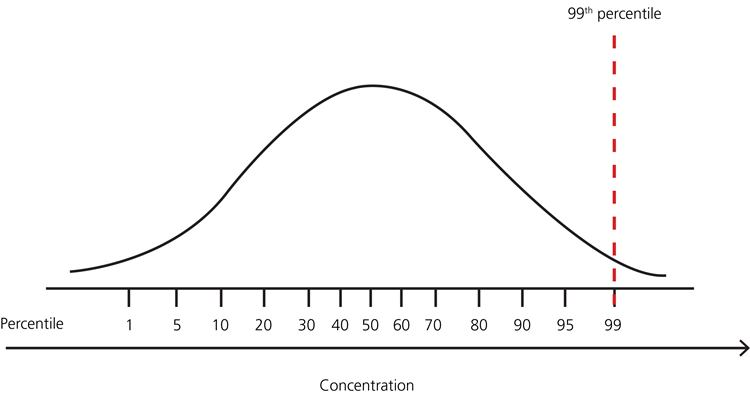

### Outlier Treatment:
- After we find outliers in our dataset, this is the time to do some treatment to those outliers.

#### There are 2 important treatment that we can do:
- 1. Trimming: Just remove those outliers from the dataset. But this is not that easy. It totaly depends upon problem we will be dealing with beacause according to problem statement only we can decide wheter outliers are important or not. Also if there are large number of outliers present than trimming those outliers may lead to data thining.



- 2. Capping: Replace outliers with some upper limit and lower limit. In this case capping is also known as Winsorization.


In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

In [6]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [7]:
import seaborn as sns

<AxesSubplot:xlabel='Height', ylabel='Density'>

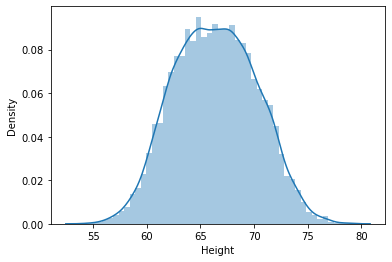

In [8]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height'>

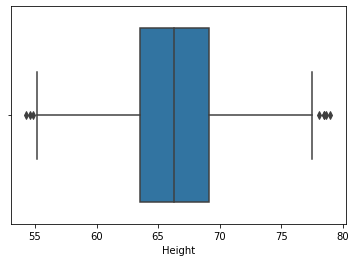

In [9]:
sns.boxplot(df['Height'])

In [10]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [11]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [12]:
upper_limit = round(upper_limit, 2)
lower_limit = round(lower_limit, 2)

In [23]:
# outliers
df[(df['Height'] > upper_limit) | (df['Height'] < lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [27]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [32]:
new_df.sample(5)

,Gender,Height,Weight
9422,Female,65.818634,157.507511
8849,Female,64.795817,172.691881
5359,Female,62.455719,138.360765
9063,Female,64.659437,151.461272
7145,Female,60.124168,109.388928


In [28]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

In [29]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

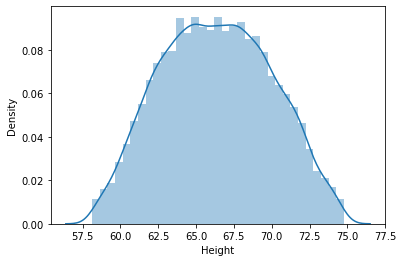

In [30]:
sns.distplot(new_df['Height'])

<AxesSubplot:xlabel='Height'>

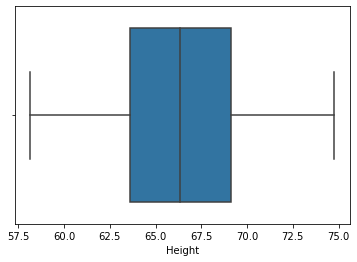

In [31]:
sns.boxplot(new_df['Height'])

### Capping : Winsorization

In [33]:
df['Height'] = np.where(df['Height'] >= upper_limit, upper_limit,
               np.where(df['Height'] <= lower_limit, lower_limit, df['Height']))

In [34]:
df.shape

(10000, 3)

In [35]:
df['Height'].describe()

count    10000.000000
mean        66.366279
std          3.795907
min         58.130000
25%         63.505620
50%         66.318070
75%         69.174262
max         74.790000
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

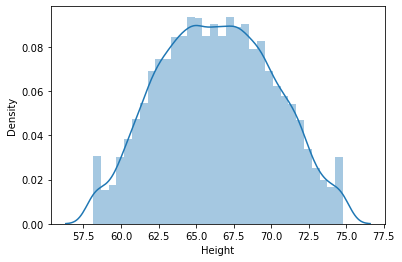

In [36]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height'>

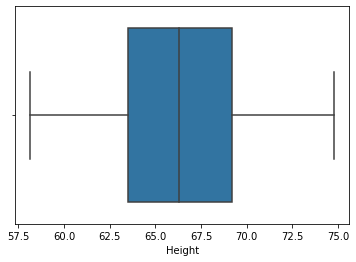

In [37]:
sns.boxplot(df['Height'])